## **Data Mining with Python**
### **Semana 10: Naive Bayes**
**Andrés C. Medina Sanhueza**

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from plotnine import *
import numpy as np
import pandas as pd

In [2]:
iris = datasets.load_iris() 
tempDF = pd.DataFrame(iris.data, columns = iris.feature_names)
tempDF['clase'] = iris.target_names[iris.target]

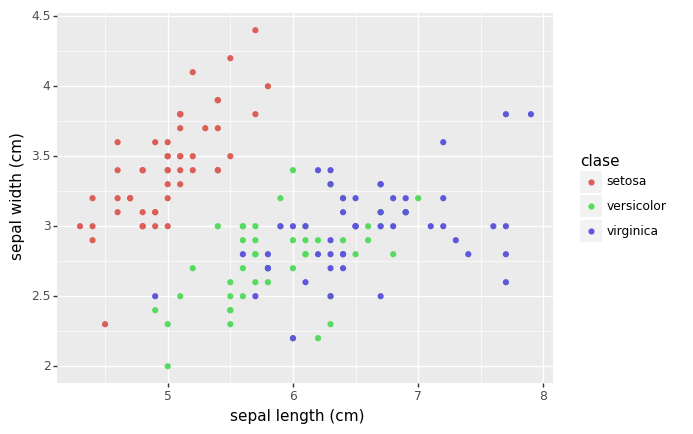

<ggplot: (8755157016239)>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.33, random_state = 42)

(
    ggplot(tempDF) + 
    aes(x="sepal length (cm)", y = "sepal width (cm)",color = "clase") + 
    geom_point() 
)

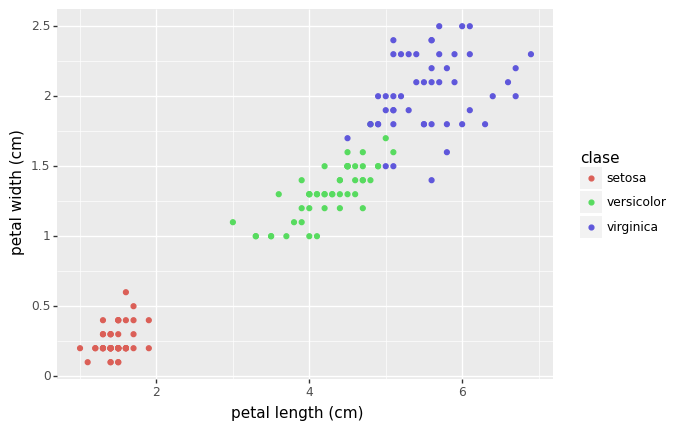

<ggplot: (8755156971039)>

In [5]:
(
    ggplot(tempDF) + 
    aes(x="petal length (cm)", y = "petal width (cm)", color = "clase") + 
    geom_point()
)

---
### **Modulo `naive_bayes()`**

El módulo `sklearn.naive_bayes` tiene distintas clases para poder entrenar y aplicar el modelo Naive Bayes. En este curso aprenderemos las clases `GaussianNB` y `CategoricalNB`.

`GaussianNB` aplica Naive Bayes sobre datos numéricos asumiendo distribuciones Gausseanas para cada clase.

**Parámetro**

* `var_smoothing:` suavización para el cálculo de la varianza para estabilidad.

**Atributos**

* `class_count_:` número de datos de entrenamiento para cada clase.
* `class_prior_:` probabilidad de cada clase $P(C)$.
* `classes_n:` número de clases conocidas por el clasificador.
* `sigma_n:` Varianza de cada distribución.
* `theta_n:` media de cada distribución.

**Métodos/funciones**

* `fit(X, y):` *Entrenamiento* del modelo, se tiene que dar los datos y la clase 
* `predict(X):` predice las etiquetas para los puntos dados
* `predict_proba(X):` predice las probabilidades de las clases para los puntos dados
* `predict_log_proba(X):` predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [6]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(X_train,y_train)

In [7]:
resultado = NB.predict(X_test)
print("Resultado de la predicción:\n", resultado)
print("Resultado original:\n", y_test)

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


In [8]:
resultado = NB.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado)

Resultado de la predicción:
 [[4.37674065e-088 9.96967740e-001 3.03225987e-003]
 [1.00000000e+000 1.10075926e-013 5.75548232e-021]
 [8.81811890e-285 2.91560680e-012 1.00000000e+000]
 [9.76309671e-092 9.77779145e-001 2.22208554e-002]
 [1.19289056e-103 8.59834631e-001 1.40165369e-001]
 [1.00000000e+000 6.25385602e-013 3.18762182e-021]
 [2.93829356e-051 9.99965857e-001 3.41429329e-005]
 [3.80802438e-172 4.36088518e-007 9.99999564e-001]
 [9.28005614e-094 9.94415433e-001 5.58456693e-003]
 [1.09359734e-057 9.99961685e-001 3.83153607e-005]
 [4.25689235e-148 2.84005095e-004 9.99715995e-001]
 [1.00000000e+000 1.14554410e-016 2.75447667e-025]
 [1.00000000e+000 2.18809733e-016 1.79350400e-024]
 [1.00000000e+000 2.40971008e-016 9.91176123e-025]
 [1.00000000e+000 2.04358169e-016 3.72718936e-024]
 [6.89484766e-105 4.73744646e-001 5.26255354e-001]
 [8.97387402e-199 3.11042966e-007 9.99999689e-001]
 [7.14361702e-054 9.99991545e-001 8.45481720e-006]
 [1.91015584e-082 9.98582440e-001 1.41756017e-003]
 [

In [9]:
print("Clases:\n",iris.target_names)
print("características:\n",iris.feature_names)
print("\nMedias:\n",NB.theta_)
print("\nDesviación estandar:\n",np.sqrt(NB.sigma_))

Clases:
 ['setosa' 'versicolor' 'virginica']
características:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Medias:
 [[4.96451613 3.37741935 1.46451613 0.2483871 ]
 [5.85142857 2.72571429 4.22       1.30857143]
 [6.55294118 2.97058824 5.54411765 2.01176471]]

Desviación estandar:
 [[0.33461426 0.36957664 0.18236509 0.10737625]
 [0.52119173 0.29504756 0.49442608 0.20194969]
 [0.66696649 0.30344048 0.54675039 0.27840376]]


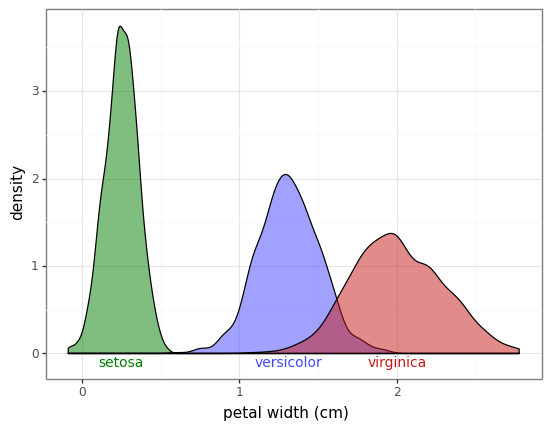

<ggplot: (8755156873837)>

In [10]:
#Visualización de las distribuciones 

tempDF = pd.DataFrame(np.zeros((1000,3)),columns=['setosa','versicolor','virginica'])
varSeleccionada = 3
for i in range(3):
    tempDF.iloc[:,i] = np.random.normal(NB.theta_[i][varSeleccionada], np.sqrt(NB.sigma_[i][varSeleccionada]), 1000)

(
    ggplot(tempDF) + 
    theme_bw() + 
    geom_density(aes(x='setosa'),fill = "#007F00",alpha = 0.5) + 
    geom_density(aes(x='versicolor'),fill = "#4446FF",alpha = 0.5) +
    geom_density(aes(x='virginica'),fill = "#C41A16",alpha = 0.5) +
    annotate("text",x=tempDF.setosa.mean(),y = -0.1,label = "setosa", color = "#007F00", size = 10)+
    annotate("text",x=tempDF.versicolor.mean(),y = -0.1,label = "versicolor",color = "#4446FF",size = 10)+
    annotate("text",x=tempDF.virginica.mean(),y = -0.1,label = "virginica",color = "#C41A16",size = 10)+ 
    labs(y="density",x=iris.feature_names[varSeleccionada])
)

/tmp/ipykernel_1496674/3296549061.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


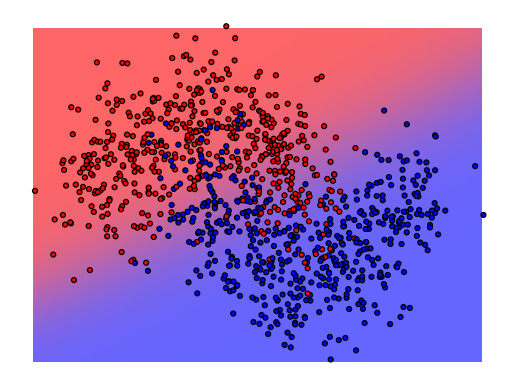

In [11]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

tempData = make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=10)
tempData[0][tempData[1]==1,1]=tempData[0][tempData[1]==1,1]
tempData[0][tempData[1]==1,0]=tempData[0][tempData[1]==1,0]

X_train, X_test, y_train, y_test = train_test_split(tempData[0],tempData[1], test_size=0.33, random_state=42)

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(X_train,y_train)

#Visualización de la frontera de decisión.
#Creando una grilla de evaluación
x = np.arange(tempData[0][:,0].min(),tempData[0][:,0].max(), 0.05)
y = np.arange(tempData[0][:,1].min(),tempData[0][:,1].max(),0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten(),columns=["xx"])
dataTest.insert(1,"yy",temp[1].flatten())

#Prediciendo y graficando el output
probEstimada=NB.predict_proba(dataTest.iloc[:,0:2])
output=(((1-probEstimada[:,1])*255).astype("int"))

dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (output[i],0,255-output[i])

#Colores para los puntos originales
colorData=pd.DataFrame(list(map(str,tempData[1])),columns=["colorClass"])
colorData.colorClass[colorData.colorClass=="0"]="Red"
colorData.colorClass[colorData.colorClass=="1"]="Blue"
    
# Generating the plot with ggplot/plotnine
pp=(ggplot()+theme_void()
  +geom_tile(aes(x=dataTest.xx,y=dataTest.yy),alpha=0.6,show_legend=False,fill=dataTest.ClassOutput)
  +geom_point(aes(x=tempData[0][:,0],y=tempData[0][:,1]),show_legend=False,color="black",fill=colorData)
)
print(pp)

---
### **Datos Categoricos**

Lamentablemente sklearn no ha querido trabajar con texto, por lo cual, todos los datos hay que cambiarlos a números antes de aplicar el modelo. Esto ha llevado a una MUY MALA práctica (vista en varios "post" de machine learning), que es aplicar GaussianNB a los datos transformados, lo cual no tiene sentido.

Para aplicar Naive Bayes sobre datos categóricos se utiliza la clase `CategoricalNB`

**Parámetro**

* `alpha:` Laplace smoothing (0 para no tener smoothing).<br>

**Atributos**

* `class_count_:` número de datos de entrenamiento para cada clase.
* `classes_n:` número de clases conocidas por el clasificador.
* `category_count_:` número de datos de entrenamiento para cada categoría.
* `class_log_prior_:` logaritmo de la probabilidad de cada clase $P(C)$. 
* `feature_log_prob_:` logaritmo de la probabilidad para cada variable dada cada clase $P(X|C)$

**Métodos/funciones**

* `fit(X, y):` "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* `predict(X):` predice las etiquetas para los puntos dados
* `predict_proba(X):` predice las probabilidades de las clases para los puntos dados
* `predict_log_proba(X):` predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [12]:
from sklearn.model_selection import train_test_split

#Leyendo los datos de banco
df = pd.read_csv('data/bank.csv',sep=';')
df = df.iloc[:,[1,2,3,4,6,7,8,16]]

#Creando mapa para entender el modelo y transformándolo a valores numéricos
mapa = {}
for i in df.columns:
    mapa[i] = np.sort(df[i].unique())
    df[i] = df[i].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:7],df.iloc[:,7], test_size=0.33, random_state=42)
print(df.head(6))
mapa

   job  marital  education  default  housing  loan  contact  y
0   10        1          0        0        0     0        0  0
1    7        1          1        0        1     1        0  0
2    4        2          2        0        1     0        0  0
3    4        1          2        0        1     1        2  0
4    1        1          1        0        1     0        2  0
5    4        2          2        0        0     0        0  0


{'job': array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 'marital': array(['divorced', 'married', 'single'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'telephone', 'unknown'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [13]:
from sklearn.naive_bayes import CategoricalNB
NB = CategoricalNB()
NB = NB.fit(X_train,y_train)

#Aplicando el modelo a otros datos
resultado=NB.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

#Aplicando el modelo a otros datos
resultado=NB.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado)

Resultado de la predicción:
 [0 0 0 ... 0 0 0]
Resultado original:
 2398    0
800     0
2288    0
2344    0
3615    0
       ..
3034    0
2405    0
218     0
2498    0
1563    0
Name: y, Length: 1492, dtype: int8
Resultado de la predicción:
 [[0.91616464 0.08383536]
 [0.74835417 0.25164583]
 [0.84189326 0.15810674]
 ...
 [0.96795977 0.03204023]
 [0.94025834 0.05974166]
 [0.90403053 0.09596947]]


In [14]:
#Analizando los parámetros aprendidos
print("Probabilidades de las clases (a priori)\n",np.exp(NB.class_log_prior_))
print("\nmapeo variable job\n",mapa["job"])
print("Probabilidad de job condicionada en no\n",np.round(np.exp(NB.feature_log_prob_[0][0]),2))
print("Probabilidad de job condicionada en si\n",np.round(np.exp(NB.feature_log_prob_[0][1]),2))

Probabilidades de las clases (a priori)
 [0.88015847 0.11984153]

mapeo variable job
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Probabilidad de job condicionada en no
 [0.1  0.21 0.04 0.02 0.21 0.05 0.04 0.1  0.02 0.17 0.03 0.01]
Probabilidad de job condicionada en si
 [0.11 0.13 0.02 0.03 0.25 0.11 0.05 0.07 0.04 0.15 0.02 0.02]
